# Neuron population connectios

### import essential librarries

In [1]:
import synapticflow as sf
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import torch
import math

### preparing datasts

In [2]:
def constant_cuurent():
    return [3000] * 1000

In [3]:
def step_current():
    time = np.arange(1, 101, 0.05)
    value = [1000.0]
    j = 1
    for i in range(1, len(time)):
        if i % 500 == 0:
            j += 1
        value.append(j * 1000)
    current = pd.DataFrame({'time' : time, 
                            'value' : value})
    return current

In [104]:
def sin_function(x):
    return math.sin(x) * 1000 + 1000

def sin_current():
    time = np.arange(1, 101, 0.05)
    value = []
    j = 1
    for i in range(len(time)):
        value.append(sin_function(i))
    current = pd.DataFrame({'time' : time, 
                            'value' : value})
    return current

In [105]:
def plot_current(df):
  plt.figure(figsize = (6, 4))
  plt.plot(df)
  plt.xlabel('time(ms)')
  plt.ylabel('current(pA)')

## 1 - Normal connection
in this case, we connect all the neurons with a normal destribution together which.

we first use constant current for our population

In [106]:
# setting parameters
number_nourons = 15
dt = 1

In [56]:
neurons_1 = sf.LIFPopulation(n = number_nourons, dt = dt, tau_s= 10, refrac_length=0, R = 20)

In [57]:
# guassian_weight = torch.stack([torch.randn(number_nourons) for _ in range(number_nourons)], dim = 1)

In [58]:
# guassian_weight.shape

In [59]:
# run model.forward for our population with the connection mode
def process(input_curr, connection, population):
    inner_current = torch.zeros_like(torch.tensor([0] * 15))
    spikes_n = []
    voltage_n = []
    for current in input_curr:
        curr = torch.tensor([current] * 15) + inner_current
        population.forward(curr)
        spikes = population.s
        voltage_n.append(population.v)
        spikes_n.append(spikes)
        inner_current = connection.compute(spikes)
    return inner_current, population, spikes_n, voltage_n

In [60]:
connection = sf.Connection(pre=neurons_1, post=neurons_1)

In [61]:
current = constant_cuurent()

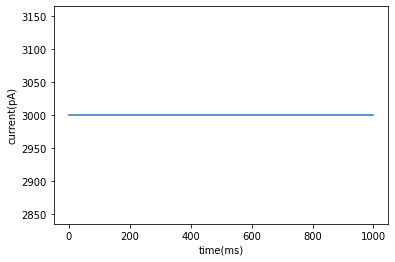

In [62]:
# plot the current
plot_current(current)

In [63]:
population_inner_current, population, spikes, voltage = process(current, connection, neurons_1)

In [64]:
population_inner_current

tensor([9.3028, 7.0521, 8.3836, 7.0938, 5.7215, 7.5187, 7.3563, 7.8031, 7.4545,
        5.5970, 7.6460, 7.7902, 8.1542, 4.7087, 7.9813])

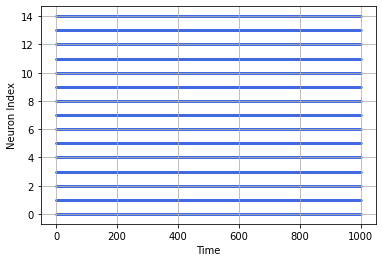

In [65]:
# raster plot 
sf.raster_plot(spikes, dt = 1)

### try step current

In [66]:
dt = 0.05

In [67]:
neurons_2 = sf.LIFPopulation(n = number_nourons, dt = dt, tau_s= 10, refrac_length=0, R = 20)

In [68]:
connection_1 = sf.Connection(pre=neurons_2, post=neurons_2)

In [69]:
step_curr = step_current()

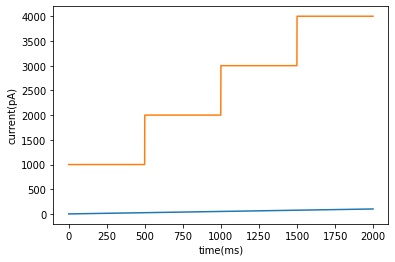

In [70]:
plot_current(step_curr)

In [71]:
population_inner_current, population, spikes, voltage = process(step_curr['value'], connection_1, neurons_2)

In [72]:
population_inner_current

tensor([7.6094, 8.4937, 6.1200, 6.6553, 7.6200, 9.7340, 6.6847, 5.5302, 7.3923,
        7.9326, 6.0574, 8.8053, 7.3927, 8.5004, 6.4733])

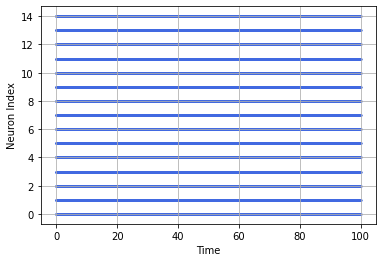

In [73]:
sf.raster_plot(spikes, dt = 0.05)

### sin current

In [107]:
dt = 0.05

In [108]:
neurons_3 = sf.LIFPopulation(n = 15, dt = dt, refrac_length=0)

In [109]:
current = sin_current()

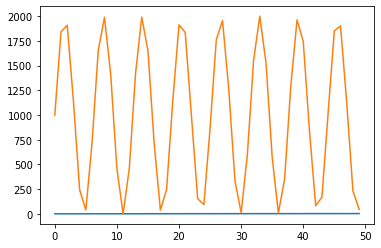

In [110]:
plt.plot(current[:50])[0]

In [111]:
connection_2 = sf.Connection(pre=neurons_3, post=neurons_3)

In [112]:
population_inner_current, population, spikes, voltage = process(current['value'], connection_2, neurons_3)

In [113]:
population_inner_current

tensor([6.7814, 7.6466, 7.6069, 8.2811, 7.3797, 9.2695, 6.9541, 4.9389, 9.4164,
        8.4023, 6.5268, 6.7785, 8.2190, 6.2680, 8.9733])

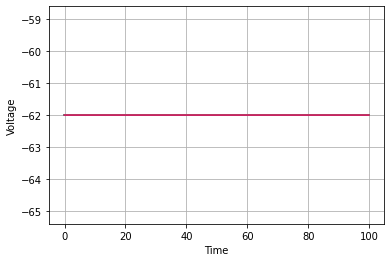

In [114]:
sf.plot_potential(voltage, dt = 0.05)

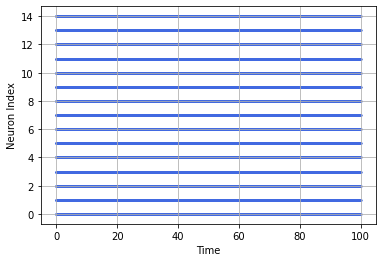

In [115]:
sf.raster_plot(spikes, dt = 0.05)

## Guassian connection 
we first try constant current

In [132]:
guassian_weight = torch.stack([abs(torch.randn(number_nourons) * 100) for _ in range(number_nourons)], dim = 1)

In [133]:
current = constant_cuurent()

In [134]:
dt = 1

In [135]:
neurons_G1 = sf.LIFPopulation(n = 15, dt = dt)

In [136]:
connection_G1 = sf.Connection(pre = neurons_G1, post=neurons_G1, w = guassian_weight)

In [137]:
population_inner_current, population, spikes, voltage = process(current, connection_G1, neurons_G1)

In [138]:
population_inner_current

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

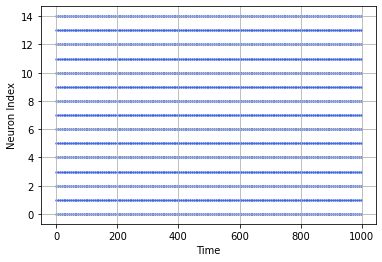

In [139]:
sf.raster_plot(spikes, dt = 1)

### try step current

In [141]:
dt = 0.05

In [143]:
neurons_G2 = sf.LIFPopulation(n = 15, dt = dt)

In [144]:
connection_G2 = sf.Connection(pre = neurons_G2, post=neurons_G2, w = guassian_weight)

In [145]:
current = step_current()

In [147]:
population_inner_current, population, spikes, voltage = process(current['value'], connection_G2, neurons_G2)

In [148]:
population_inner_current

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

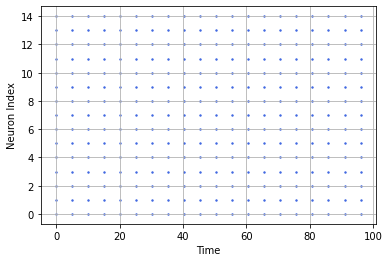

In [150]:
sf.raster_plot(spikes, dt = 0.05)

### try sin current

In [ ]:
dt = 0.05

In [151]:
neurons_G3 = sf.LIFPopulation(n = 15, dt = dt)

In [152]:
connection_G3 = sf.Connection(pre=neurons_G3, post=neurons_G3, w = guassian_weight)

In [153]:
current = sin_current()

In [154]:
population_inner_current, population, spikes, voltage = process(current['value'], connection_G3, neurons_G3)

In [155]:
population_inner_current

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

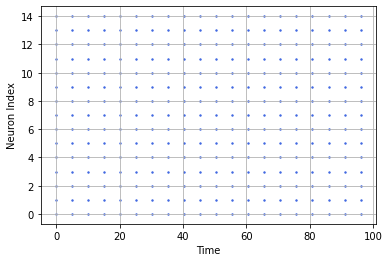

In [156]:
sf.raster_plot(spikes, dt = 0.05)

## ALL to ALL connection scaling with number of neurons

In [157]:
J0 = 5
N = 15

In [161]:
weights = torch.stack([torch.tensor([J0 / N] * N) for _ in range(N)], dim = 1)

we will start with constant current.

In [165]:
current = constant_cuurent()

In [166]:
dt = 1

In [167]:
neurons_A1 = sf.LIFPopulation(n = N, dt = dt)

In [168]:
connection_A1 = sf.Connection(pre =neurons_A1, post = neurons_A1, w = weights)

In [169]:
population_inner_current, population, spikes, voltage = process(current, connection_A1, neurons_A1)

In [170]:
population_inner_current

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

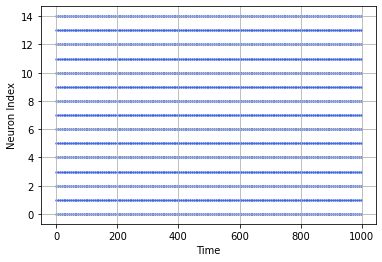

In [173]:
sf.raster_plot(spikes, dt = 1)

# Question 2

In [28]:
import torch
import synapticflow as sf
import math
import numpy as np

In [2]:
# generate the popolations 
population_E1, population_E2 = sf.LIFPopulation(n = 5, refrac_length=3, dt = 1, tau_s=10), sf.LIFPopulation(n = 5, refrac_length=2, dt = 1, tau_s=10)
population_I = sf.LIFPopulation(n = 5,tau_s=1,dt = 1, refrac_length=1, is_inhibitory=True)

In [3]:
population_I.forward(torch.tensor(1))
population_I.s

tensor([True, True, True, True, True])

In [4]:
#set the connections between the individual population neurons(normal weights)
connection_I = sf.Connection(pre = population_I, post=population_I)
connection_E1 = sf.Connection(pre = population_E1, post=population_E1)
connection_E2 = sf.Connection(pre=population_E2, post = population_E2)

In [5]:
torch.clamp(torch.rand(5, 5), float('-inf'), float('inf'))

tensor([[0.1292, 0.7248, 0.0227, 0.9843, 0.8001],
        [0.8232, 0.7373, 0.2366, 0.4893, 0.9527],
        [0.3812, 0.5796, 0.6542, 0.5150, 0.2536],
        [0.1968, 0.7921, 0.2029, 0.2185, 0.8596],
        [0.0598, 0.2069, 0.0600, 0.5550, 0.9652]])

In [6]:
inhibitory_weight = torch.clamp(-1 * torch.rand(5, 5), float('-inf'), float(0))

In [7]:
inhibitory_weight

tensor([[-0.9575, -0.4594, -0.8704, -0.6575, -0.9995],
        [-0.8301, -0.2423, -0.7634, -0.8221, -0.9010],
        [-0.0063, -0.2628, -0.5509, -0.0874, -0.5263],
        [-0.5315, -0.0692, -0.3939, -0.0364, -0.1134],
        [-0.0909, -0.2685, -0.3329, -0.6861, -0.2189]])

In [8]:
# set the connection with other neurons populations
connection_IE1 = sf.Connection(pre = population_I, post = population_E1)
connection_EI1 = sf.Connection(pre = population_E1, post=population_I)
connection_IE2 = sf.Connection(pre = population_I, post=population_E2)
connection_EI2 = sf.Connection(pre = population_E2, post = population_I)

In [9]:
def process(current1 , current2, population_E1, population_E2, population_I, connection_E1, connection_E2, 
            connection_EI1, connection_EI2, connection_IE1, connection_IE2):
    # some list the store spikes data
    spikes_E1 = []
    spikes_E2 = []
    spikes_I = []
    # the inner communication of neurons
    inner_currentE1 = torch.zeros_like(torch.tensor([0] * 5))
    inner_currentE2 = torch.zeros_like(torch.tensor([0] * 5))
    inner_current_IE1 = torch.zeros_like(torch.tensor([0] * 5))
    inner_current_IE2 = torch.zeros_like(torch.tensor([0] * 5))
    inner_current_EI1 = torch.zeros_like(torch.tensor([0] * 5))
    inner_current_EI2 = torch.zeros_like(torch.tensor([0] * 5))
    for i in range(len(current1)):
        # E1
        curr1 = torch.tensor([current1[i]] * 5) + inner_currentE1 - inner_current_IE1 # pass the currents in first ecxitatory population
        population_E1.forward(curr1)
        spikes_e1 = population_E1.s
        inner_currentE1 = connection_E1.compute(spikes_e1)
        spikes_E1.append(spikes_e1)
        # E2
        curr2 = torch.tensor([current2[i]] * 5) + inner_currentE2 - inner_current_IE2 # second ecxitataory population
        population_E2.forward(curr2)
        spikes_e2 = population_E2.s
        inner_currentE2 = connection_E2.compute(spikes_e2)
        spikes_E2.append(spikes_e2)
        # EI1
        inner_current_EI1 = connection_EI1.compute(spikes_e1)
        inner_current_EI2 = connection_EI2.compute(spikes_e2)
        curr3 = inner_current_EI1 + inner_current_EI2 # calculating the inhibitory population input current
        population_I.forward(curr3)
        spikes_i = population_I.s
        spikes_I.append(spikes_i)
        inner_current_IE1 = connection_IE1.compute(spikes_i)
        inner_current_IE2 = connection_IE2.compute(spikes_i)
    return spikes_E1, spikes_E2, spikes_I

In [10]:
current1 = [10] * 250
current2 = [20] * 250

In [11]:
x1, x2, x3 = process(current1, current2, population_E1, population_E2, population_I, connection_E1, connection_E2, 
                     connection_EI1, connection_EI2, connection_IE1, connection_EI2)

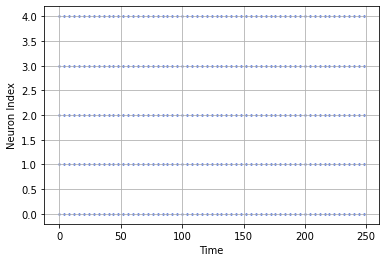

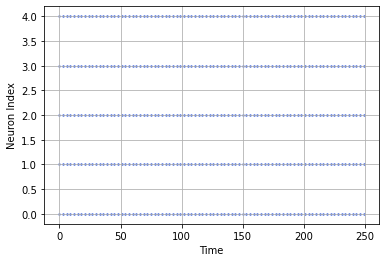

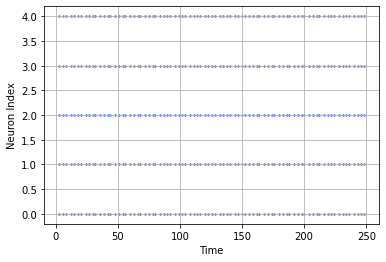

(None, None, None)

In [12]:
sf.raster_plot(x1, dt = 1), sf.raster_plot(x2, dt = 1), sf.raster_plot(x3, dt = 1)

# Question 3

In [26]:
# poisson encoding
def poisson_encoding(rate, duration, time_step):
    time = np.arange(0, duration, time_step)
    num_steps = len(time)
    spike_train = np.zeros(num_steps)
    
    for i in range(num_steps):
        spike_train[i] = np.random.poisson(rate * time_step)
    
    return spike_train

In [29]:
rate = 50 
duration = 100
time_step = 1
s = poisson_encoding(rate, duration, time_step)

In [32]:
import matplotlib.pyplot as plt

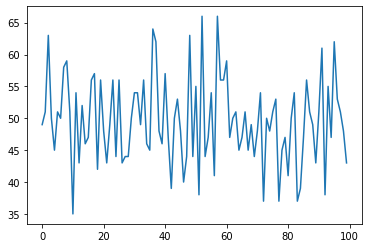

In [33]:
plt.plot(s)

In [34]:
neurons = sf.LIFPopulation(n = 3, R = 1, tau_s=20, refrac_length=3, dt = 1)

In [35]:
current = [100] * 100

In [38]:
encoder = sf.PoissonEncoder(time = 100, dt = 1)
spikes = []
poisson_code = []
for i in range(len(current)):
    neurons.forward(torch.tensor([current[i] * 3]))
    spike = neurons.s
    spikes.append(spike)
    poisson_code.append(encoder.__call__(spike))

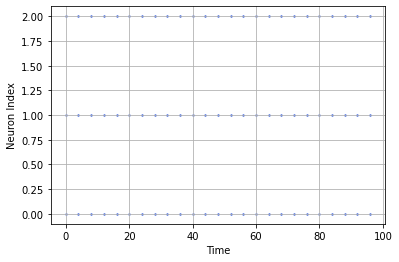

In [40]:
sf.raster_plot(spikes, dt = 1)